In [11]:
# Packages
library(ggplot2)  # visualization
library(dplyr)    # data manipulation


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [9]:
# Read the dataset and load it to a data frame
file_path <- "/content/CreditCardFraud_Dataset-4.csv"
df <- read.csv(file_path)
# Data transformations
df$MerchantID <- as.factor(df$MerchantID)         # Ensures proper grouping in plots/summaries
df$TransactionType <- as.factor(df$TransactionType)  # So ggplot doesn't treat it as text
df$Class <- factor(df$Class, levels = c("Normal", "Fraudulent"))  # So "Fraudulent" is the positive class

In [10]:
# Check for class imbalance in Class (Normal vs Fraudulent)
table(df$Class)
prop.table(table(df$Class)) * 100


    Normal Fraudulent 
      9767        233 


    Normal Fraudulent 
     97.67       2.33 

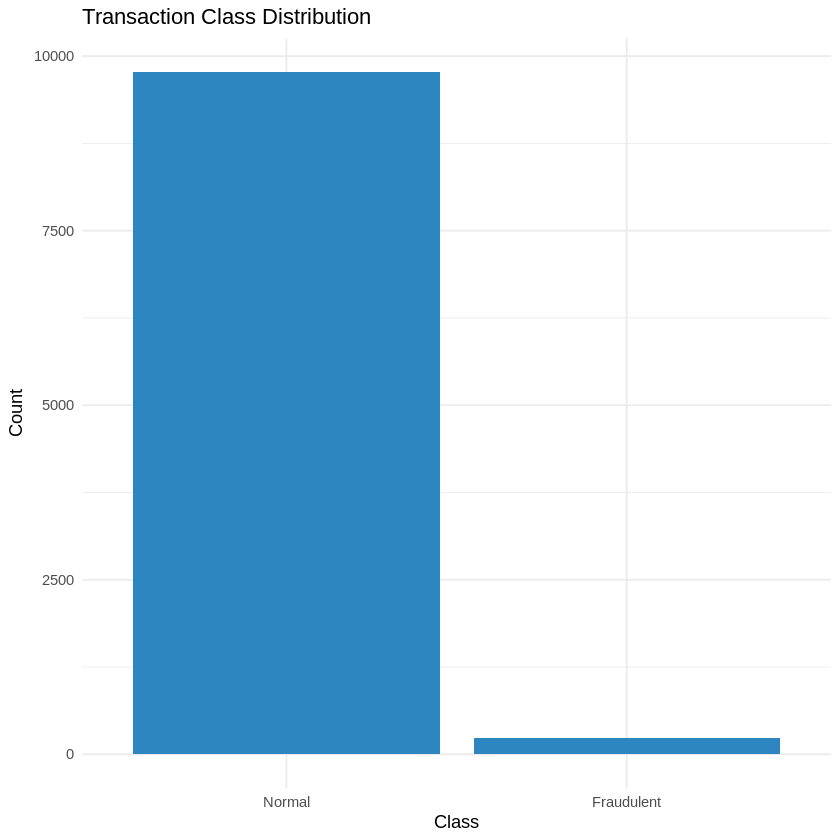

In [12]:
# Visual
ggplot(df, aes(x = Class)) +
  geom_bar(fill = "#2E86C1") +
  labs(title = "Transaction Class Distribution", x = "Class", y = "Count") +
  theme_minimal()

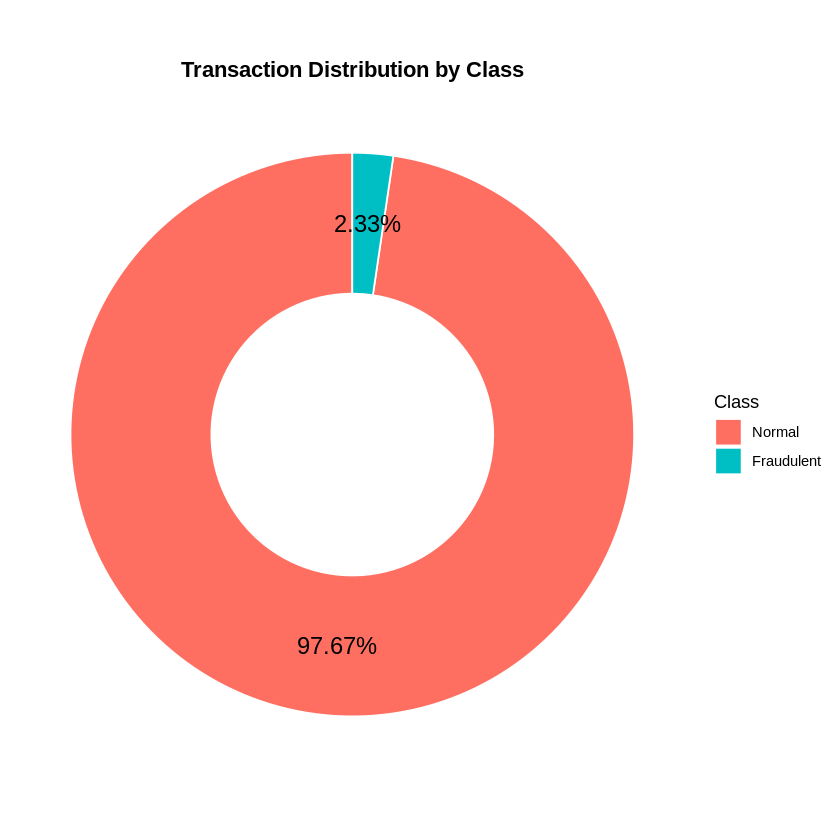

In [13]:
# Pie chart
# Step 1: Prepare data
class_counts <- df %>%
  count(Class) %>%
  mutate(Percent = round(100 * n / sum(n), 2),
         Label = paste0(Percent, "%"))
# Step 2: Create donut chart
ggplot(class_counts, aes(x = 2, y = n, fill = Class)) +
  geom_col(width = 1, color = "white") +
  coord_polar(theta = "y") +
  geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 5) +
  xlim(0.5, 2.5) +  # Creates donut hole
  theme_void() +
  theme(
    legend.position = "right",
    plot.title = element_text(hjust = 0.5, face = "bold")
  ) +
  scale_fill_manual(values = c("Normal" = "#FF6F61", "Fraudulent" = "#00BFC4")) +
  labs(title = "Transaction Distribution by Class", fill = "Class")